# Mehak Kamra

In [1]:
#importing the libraries
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#reading the dataset
data = pd.read_csv('/Users/mehakkamra/Downloads/Capstone project/Healthcare/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#checking the null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
#checking the duplicate values
sum(data.duplicated())

1

In [7]:
#dropping the duplicate value
df = data.drop_duplicates()
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='age', ylabel='count'>

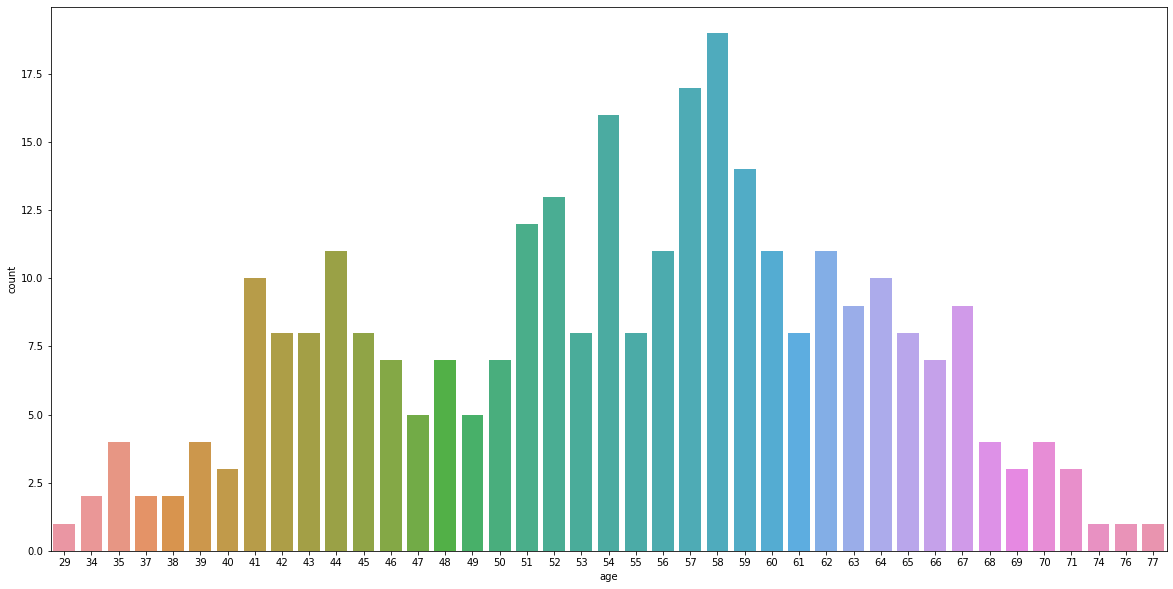

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.age,data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

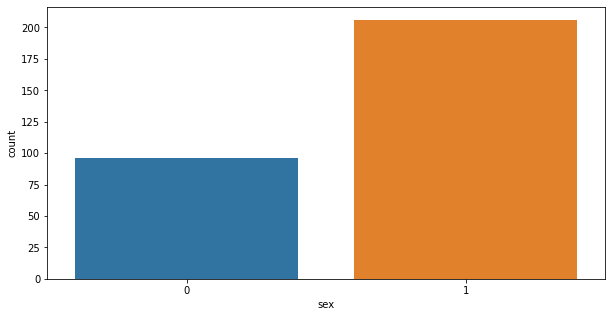

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.sex,data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

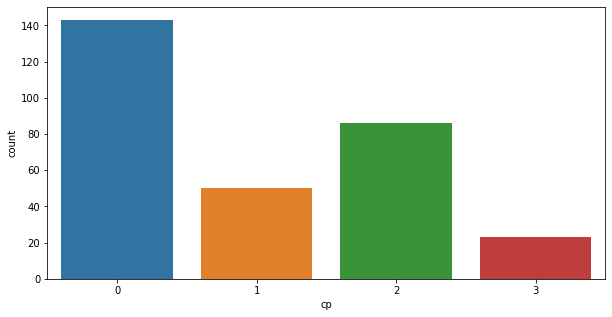

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.cp,data=df)

<AxesSubplot:xlabel='fbs', ylabel='count'>

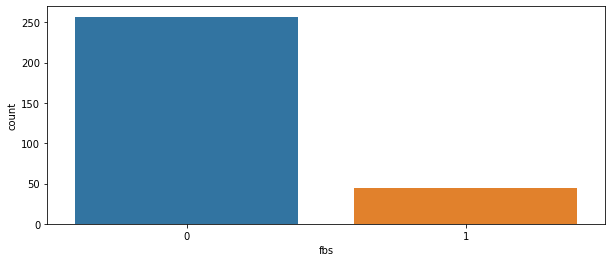

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.fbs,data=df)

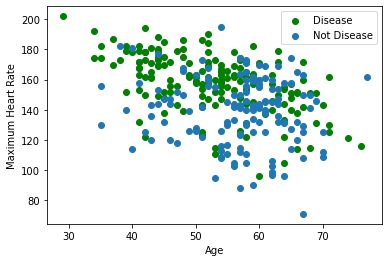

In [14]:
plt.scatter(x=df.age[df.output==1], y=df.thalachh[(df.output==1)], c="green")
plt.scatter(x=df.age[df.output==0], y=df.thalachh[(df.output==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [17]:
no_heart_disease = len(df[df.output == 0])
heart_disease = len(df[df.output == 1])
print("Percentage of Patients Haven't Heart Disease:{:.2f}%".format((no_heart_disease / (len(df.output))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((heart_disease/ (len(df.output))*100)))

Percentage of Patients Haven't Heart Disease:45.70%
Percentage of Patients Have Heart Disease: 54.30%


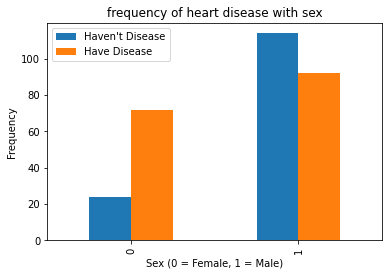

In [19]:
pd.crosstab(df.sex,df.output).plot(kind='bar')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.title("frequency of heart disease with sex")
plt.ylabel('Frequency')
plt.show()

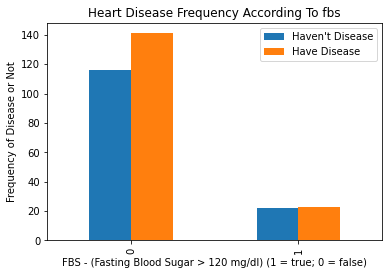

In [21]:
pd.crosstab(df.fbs,df.output).plot(kind='bar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency According To fbs')
plt.ylabel('Frequency of Disease or Not')
plt.show()

<AxesSubplot:xlabel='output', ylabel='count'>

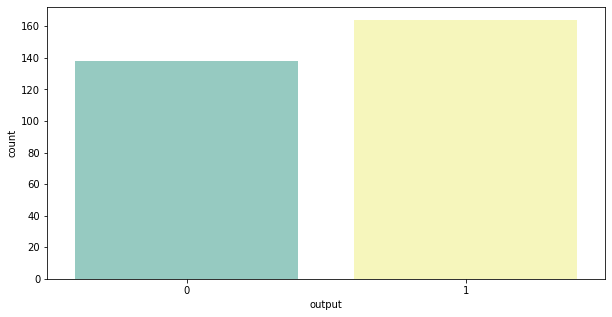

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.output,data=df,palette="Set3")

# creating dummy variables for categorical variables cp,thall,slp

In [23]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thall'], prefix = "thall")
c = pd.get_dummies(df['slp'], prefix = "slp")

In [24]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,...,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [25]:
df = df.drop(columns = ['cp', 'thall', 'slp'])
df.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,...,cp_1,cp_2,cp_3,thall_0,thall_1,thall_2,thall_3,slp_0,slp_1,slp_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
X = df.drop(['output'],axis=1)
y = df['output']

# Ada-Boost

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,stratify=y)

#the stratify is set to y, it is to make sure that the proportion of both the classes remain the same in both the train and test data. 
#Say if you have 60% of class 1 and 40% of class 0 in train data then you would have the same distribution in the test.

In [75]:
ada = AdaBoostClassifier(random_state=95)

In [76]:
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=95)

In [77]:
ada.score(X_train,y_train)

0.9336283185840708

In [78]:
ada.score(X_test,y_test)

0.7894736842105263

In [79]:
ada = AdaBoostClassifier(random_state=40,base_estimator=RandomForestClassifier(random_state=80),
                         n_estimators=50,learning_rate=0.01)

In [80]:
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=80),
                   learning_rate=0.01, random_state=40)

In [81]:
ada.score(X_train,y_train)

1.0

In [82]:
ada.score(X_test,y_test)

0.868421052631579

# random forest

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((211, 21), (91, 21))

In [84]:
c_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [85]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [86]:
grid_search = GridSearchCV(estimator=c_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [87]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [88]:
grid_search.best_score_

0.8483309143686503

In [89]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

[Text(0.5769230769230769, 0.875, 'oldpeak <= 1.7\ngini = 0.492\nsamples = 129\nvalue = [92, 119]\nclass = No heart disease'),
 Text(0.3076923076923077, 0.625, 'caa <= 0.5\ngini = 0.433\nsamples = 99\nvalue = [53, 114]\nclass = No heart disease'),
 Text(0.15384615384615385, 0.375, 'age <= 58.5\ngini = 0.229\nsamples = 68\nvalue = [15, 99]\nclass = No heart disease'),
 Text(0.07692307692307693, 0.125, 'gini = 0.178\nsamples = 54\nvalue = [9, 82]\nclass = No heart disease'),
 Text(0.23076923076923078, 0.125, 'gini = 0.386\nsamples = 14\nvalue = [6, 17]\nclass = No heart disease'),
 Text(0.46153846153846156, 0.375, 'age <= 62.5\ngini = 0.406\nsamples = 31\nvalue = [38, 15]\nclass = heart disease'),
 Text(0.38461538461538464, 0.125, 'gini = 0.314\nsamples = 24\nvalue = [33, 8]\nclass = heart disease'),
 Text(0.5384615384615384, 0.125, 'gini = 0.486\nsamples = 7\nvalue = [5, 7]\nclass = No heart disease'),
 Text(0.8461538461538461, 0.625, 'caa <= 1.5\ngini = 0.201\nsamples = 30\nvalue = [39,

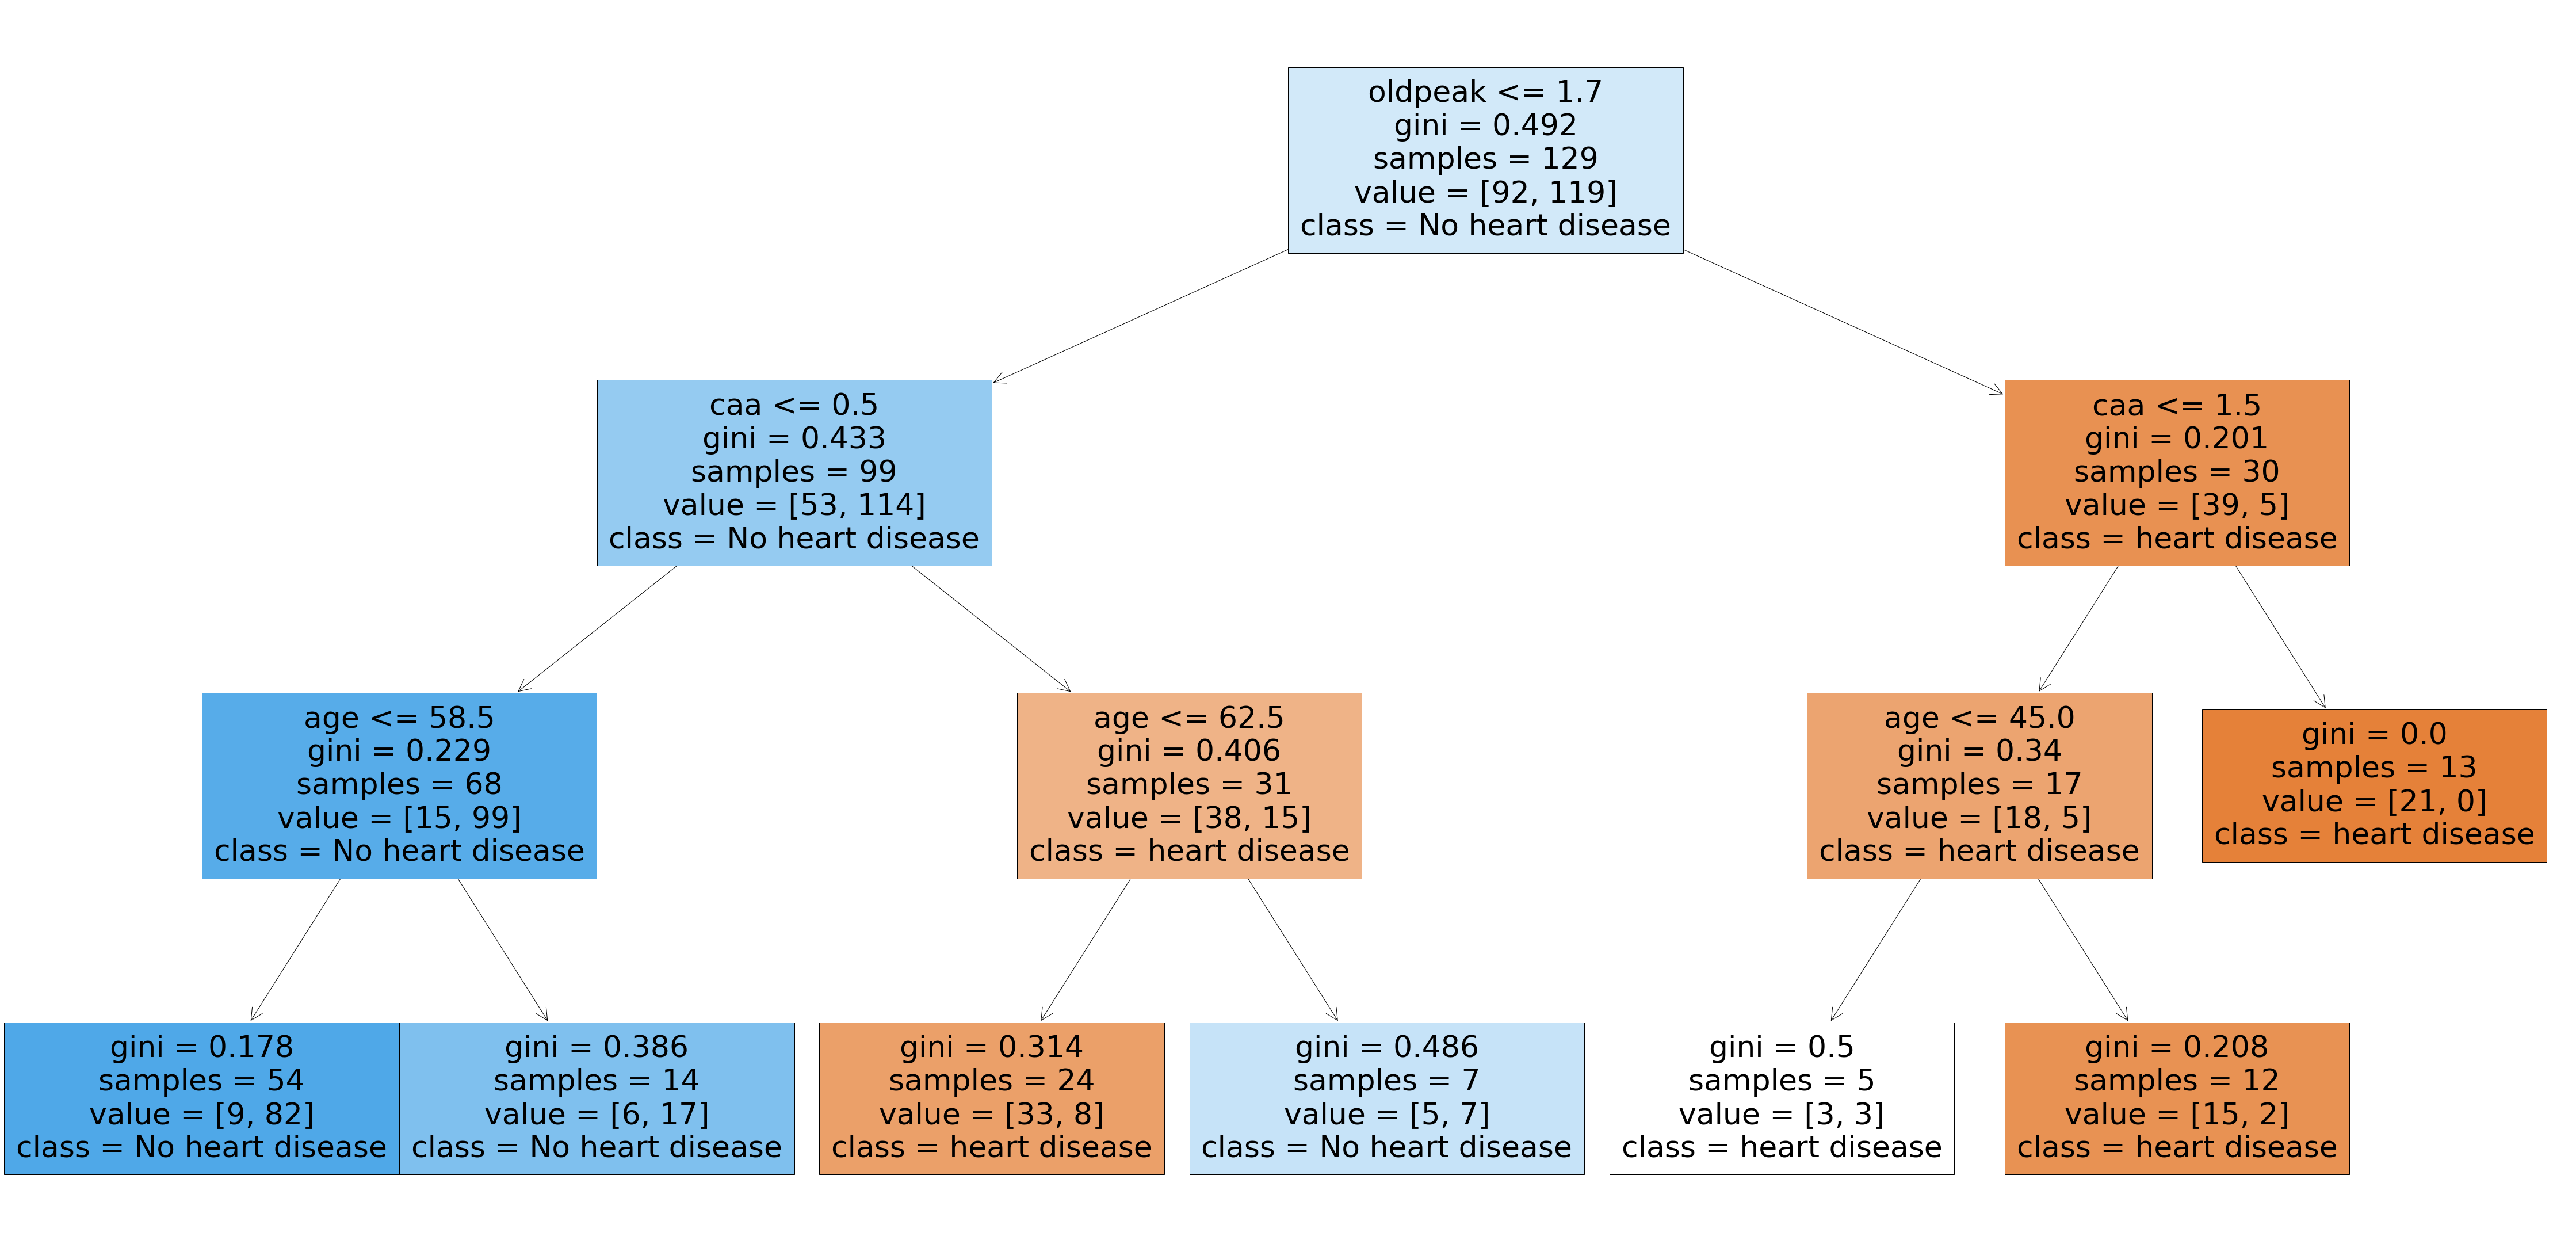

In [90]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['heart disease', "No heart disease"],filled=True)

[Text(0.5769230769230769, 0.875, 'cp_2 <= 0.5\ngini = 0.499\nsamples = 138\nvalue = [110, 101]\nclass = heart disease'),
 Text(0.3076923076923077, 0.625, 'cp_0 <= 0.5\ngini = 0.447\nsamples = 97\nvalue = [98, 50]\nclass = heart disease'),
 Text(0.15384615384615385, 0.375, 'slp_1 <= 0.5\ngini = 0.408\nsamples = 29\nvalue = [12, 30]\nclass = No heart disease'),
 Text(0.07692307692307693, 0.125, 'gini = 0.285\nsamples = 20\nvalue = [5, 24]\nclass = No heart disease'),
 Text(0.23076923076923078, 0.125, 'gini = 0.497\nsamples = 9\nvalue = [7, 6]\nclass = heart disease'),
 Text(0.46153846153846156, 0.375, 'thall_3 <= 0.5\ngini = 0.306\nsamples = 68\nvalue = [86, 20]\nclass = heart disease'),
 Text(0.38461538461538464, 0.125, 'gini = 0.47\nsamples = 31\nvalue = [28, 17]\nclass = heart disease'),
 Text(0.5384615384615384, 0.125, 'gini = 0.094\nsamples = 37\nvalue = [58, 3]\nclass = heart disease'),
 Text(0.8461538461538461, 0.625, 'thall_2 <= 0.5\ngini = 0.308\nsamples = 41\nvalue = [12, 51]\n

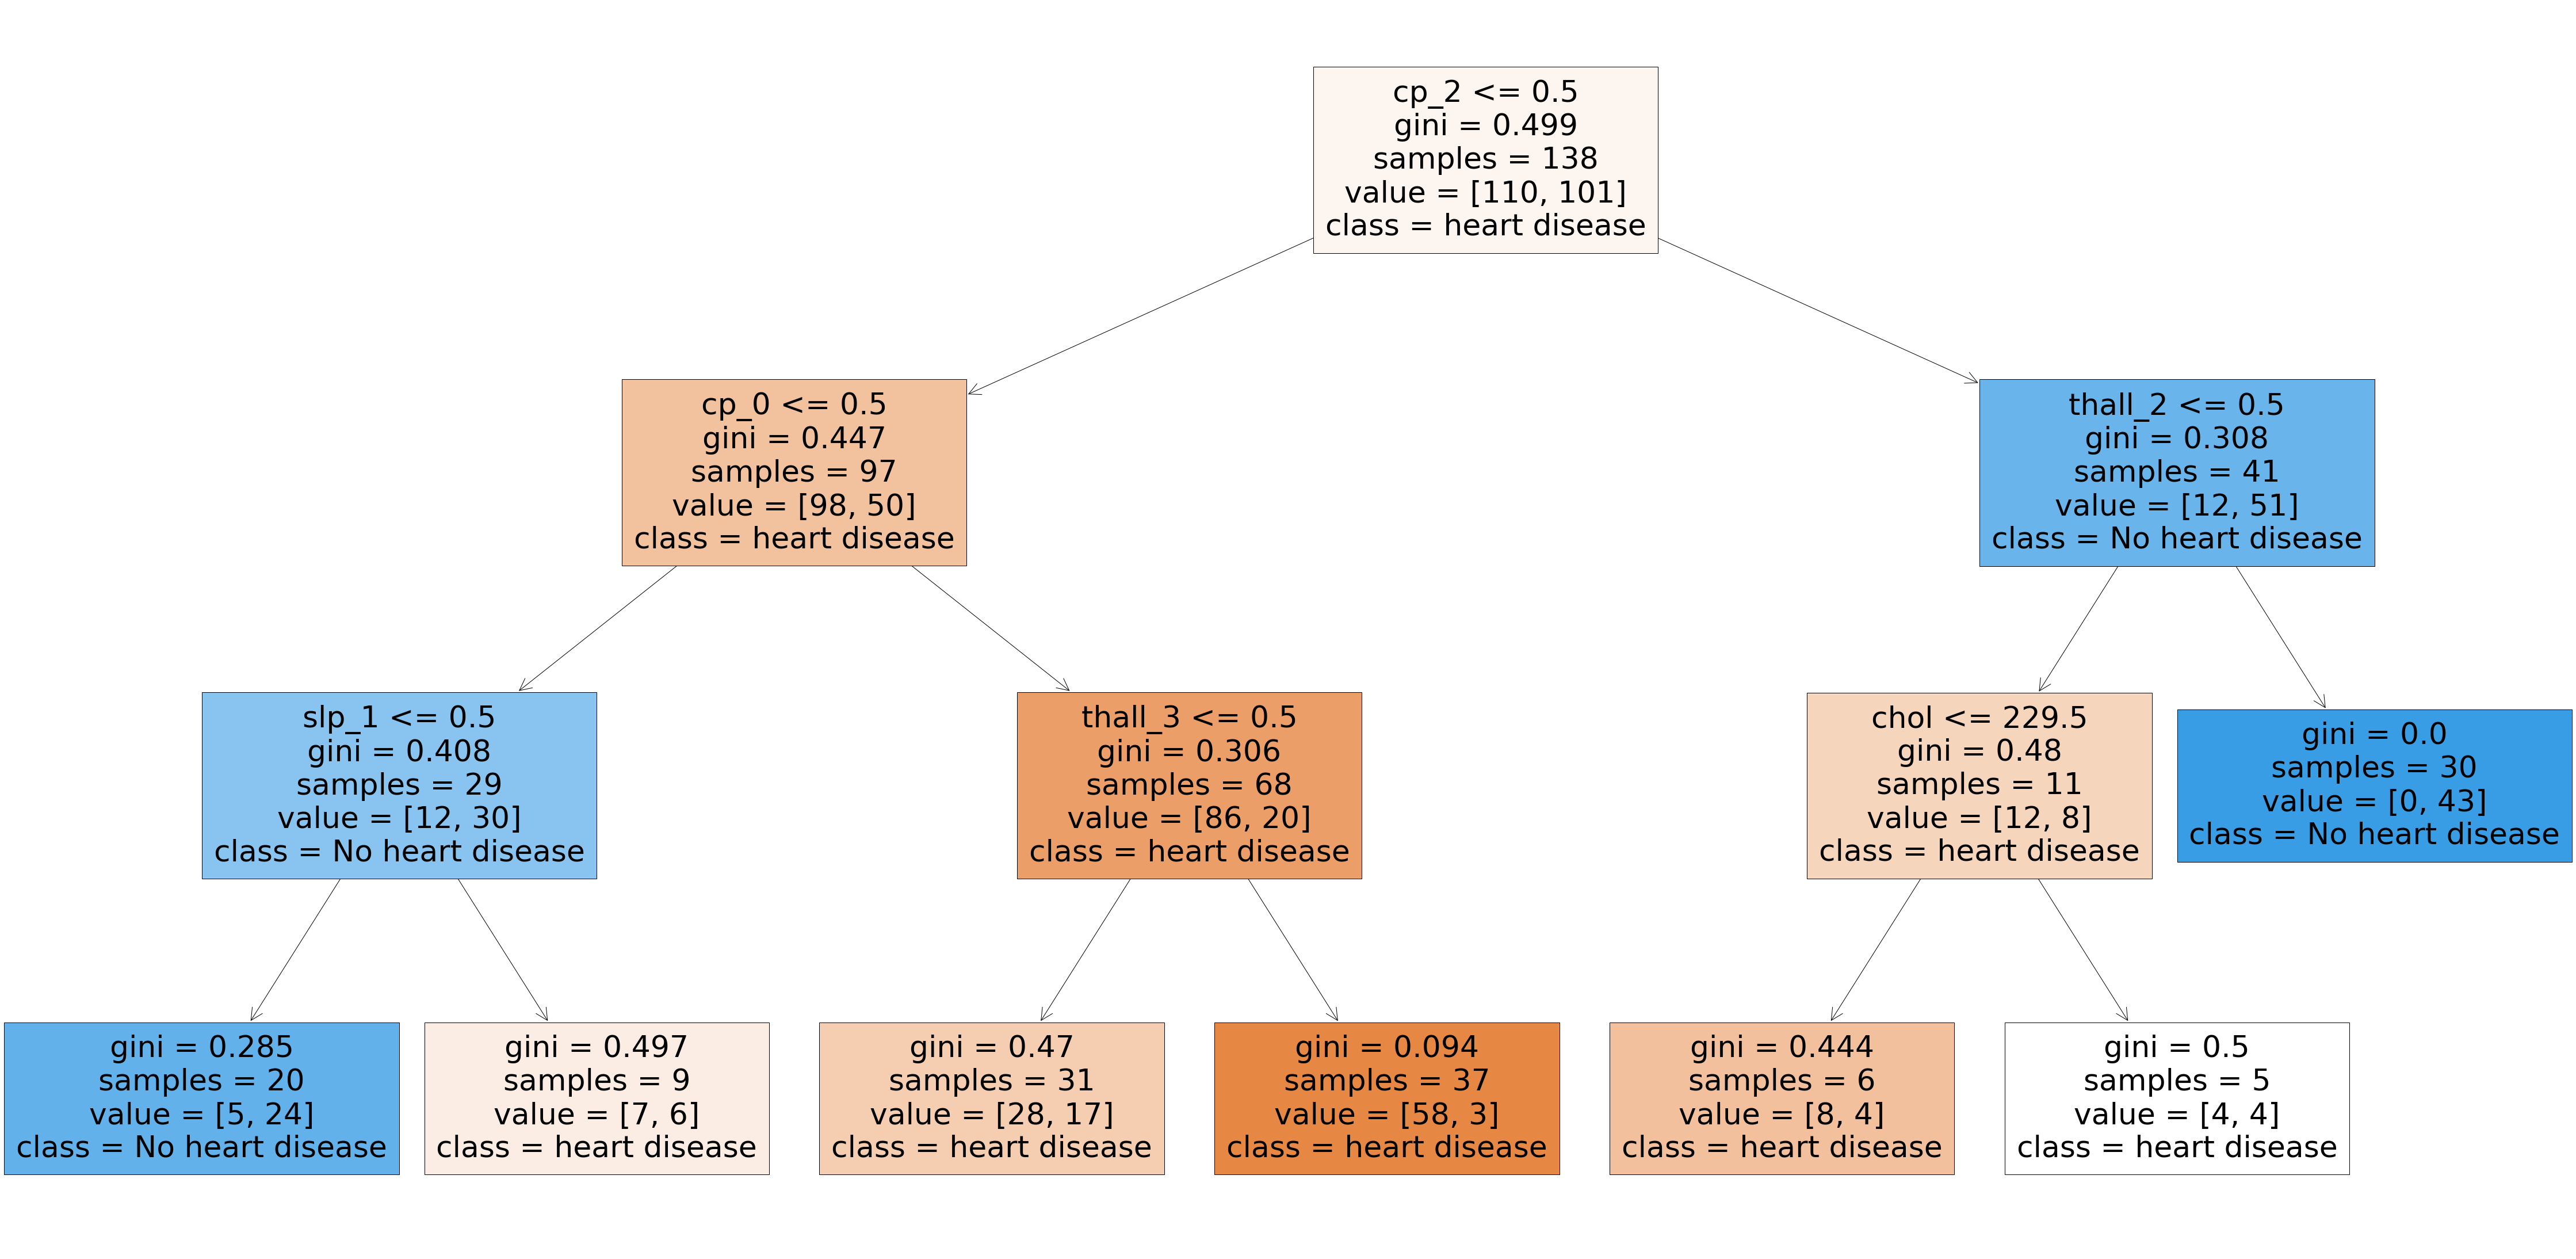

In [91]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['heart disease', "No heart disease"],filled=True)

# decision tree

In [92]:
df.output.value_counts()

1    164
0    138
Name: output, dtype: int64

/Users/mehakkamra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

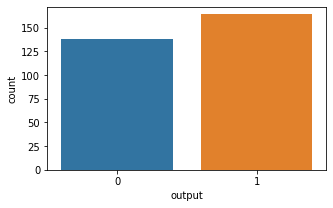

In [93]:
plt.figure(figsize=(5,3))
sns.countplot(df['output'])

In [94]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=1000)

In [95]:
model=DecisionTreeClassifier(criterion= 'entropy')

In [96]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [97]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [98]:
accuracy_score(y_pred,y_test)

0.7894736842105263

In [99]:
confusion_matrix(y_pred,y_test)

array([[29, 10],
       [ 6, 31]])

In [100]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        39
           1       0.76      0.84      0.79        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [101]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC

0.7923344947735191

# KSVM

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [103]:
svc= SVC(kernel='poly',degree = 8)
svc.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [104]:
y_pred = svc.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12 11]
 [16 22]]
              precision    recall  f1-score   support

           0       0.43      0.52      0.47        23
           1       0.67      0.58      0.62        38

    accuracy                           0.56        61
   macro avg       0.55      0.55      0.55        61
weighted avg       0.58      0.56      0.56        61



In [106]:
ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC

0.5503432494279177

# logistic regression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)  

In [108]:
lr = LogisticRegression(C=.1,random_state=100, max_iter=10000, 
                                 penalty='l1', solver='saga', n_jobs=-1) 

In [109]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=100, solver='saga')

In [110]:
lr.score(X_train,y_train)

0.7966804979253111

In [111]:
lr.score(X_test,y_test)

0.7377049180327869

In [112]:
y_pred=lr.predict(X_test)

In [113]:
print(metrics.confusion_matrix(y_test,y_pred ))

[[24 11]
 [ 5 21]]


In [114]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.66      0.81      0.72        26

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



In [115]:
metrics.accuracy_score(y_test, y_pred)

0.7377049180327869

In [116]:
ROC_AUC = roc_auc_score(y_test, y_pred)
ROC_AUC

0.7467032967032967